<a href="https://colab.research.google.com/github/kaniang/g5_machine_learning_homework/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_table('fruit_data_with_colors.txt')

In [ ]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


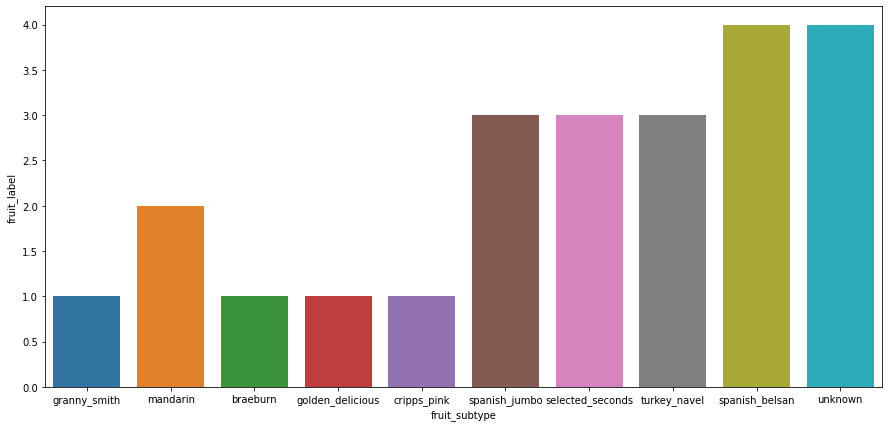

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot('fruit_subtype','fruit_label',data=df)
plt.show()

In [ ]:
fruit_type={'turkey_navel' : 3 ,'unknown' : 4, 'cripps_pink' : 1
            ,'selected_seconds' : 3, 'spanish_belsan' : 4, 'golden_delicious' : 1,
            'braeburn' : 1, 'mandarin' : 2, 'spanish_jumbo' : 3,'granny_smith' : 1}

df['fruit_subtype']=df['fruit_subtype'].map(fruit_type)

In [ ]:
df['height'].groupby(df['fruit_label']).mean()

fruit_label
1    7.342105
2    4.380000
3    7.936842
4    8.856250
Name: height, dtype: float64

In [ ]:
df['width'].groupby(df['fruit_label']).mean()

fruit_label
1    7.457895
2    5.940000
3    7.557895
4    6.512500
Name: width, dtype: float64

In [ ]:
df['mass'].groupby(df['fruit_label']).mean()

fruit_label
1    165.052632
2     81.200000
3    193.789474
4    150.000000
Name: mass, dtype: float64

In [ ]:
df['color_score'].groupby(df['fruit_label']).mean()

fruit_label
1    0.783684
2    0.796000
3    0.771053
4    0.718125
Name: color_score, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
cols=['fruit_subtype', 'mass', 'width', 'height','color_score']
X=df[cols]

y=df['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbours=np.arange(1,9)
train_accuracy=np.empty(len(neighbours))
test_accuracy=np.empty(len(neighbours))

In [ ]:
for i in range(len(neighbours)):
    knn=KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

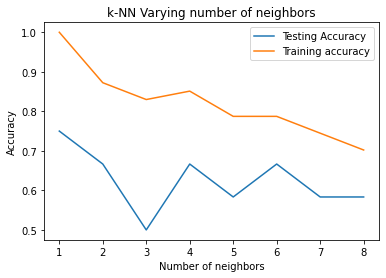

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6666666666666666

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6666666666666666